## Irvin Andres Torres Enriquez
### Implementación con Random Forest /Decisión Forest/
### Machine learning, MIC
### Olanda Prieto

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


In [11]:
data = pd.read_csv('eventos.csv')

In [12]:
print(data.head())
print(data.info())

   Year     County  PSI  ... Count  Population  ObsRate
0  2005  STATEWIDE   21  ...   321    26447738     1.21
1  2006  STATEWIDE   21  ...   341    26679904     1.28
2  2007  STATEWIDE   21  ...   353    26935982     1.31
3  2008  STATEWIDE   21  ...   346    27272108     1.27
4  2009  STATEWIDE   21  ...   308    27630962     1.11

[5 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4543 entries, 0 to 4542
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            4543 non-null   int64  
 1   County          4543 non-null   object 
 2   PSI             4543 non-null   int64  
 3   PSIDescription  4543 non-null   object 
 4   Count           4543 non-null   int64  
 5   Population      4543 non-null   int64  
 6   ObsRate         4543 non-null   float64
dtypes: float64(1), int64(4), object(2)
memory usage: 248.6+ KB
None


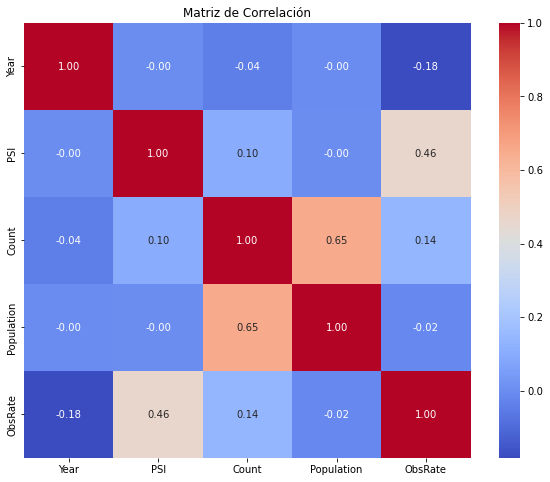

In [13]:
# Convertir variables categóricas en variables dummy
data_encoded = pd.get_dummies(data, columns=['County', 'PSIDescription'], drop_first=True)

# Filtrar solo las columnas numéricas
numeric_data = data_encoded.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [14]:
# Definimos las características y la variable objetivo
X = data.drop(['ObsRate', 'County', 'PSIDescription'], axis=1)
y = data['ObsRate']

# Dividimos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Para la versión escalada
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
# Paso 5: Modelo de Decision Forest con GridSearch

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [26]:
y_pred_rf = grid_search_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_ = r2_score(y_test, y_pred_rf)

print("Resultados del modelo Decision Forest:")
print("Mejores parámetros:", grid_search_rf.best_params_)
print("MSE:", mse_rf)
print("r^2:", r2_)

Resultados del modelo Decision Forest:
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 4.819329220660064
r^2: 0.9819227381085273


In [20]:
# Paso 6: Modelo de Random Forest con GridSearch
grid_search_rf_scaled = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf_scaled.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]})

In [30]:
import joblib
joblib.dump(grid_search_rf, 'Random_forrest.sav')

['Random_forrest.sav']

In [24]:
# Paso 7: Prueba de ambos modelos
y_pred_rf_scaled = grid_search_rf_scaled.predict(X_test_scaled)
mse_rf_scaled = mean_squared_error(y_test, y_pred_rf_scaled)
r2 = r2_score(y_test, y_pred_rf_scaled)

print("\nResultados del modelo Random Forest:")
print("Mejores parámetros (escalado):", grid_search_rf_scaled.best_params_)
print("MSE (escalado):", mse_rf_scaled)
print("r^2 (escalado):", r2)


Resultados del modelo Random Forest:
Mejores parámetros (escalado): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
MSE (escalado): 4.440351824978425
r^2 (escalado): 0.9833442790157797


### En esta practica el resultado que mejor arrojo el codigo fue el random forrest, esto puede ser ya que busca la mejor característica entre un subconjunto aleatorio de características. Al usar aletoriedad le brinda un mejor entrenamiento por lo tanto un mejor resultado